#Regression Task

##Data Preprocessing:

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 8]

In [29]:
#Read data
bitrate_train_df = pd.read_csv('bitrate_train.csv')
bitrate_test_df = pd.read_csv('bitrate_test.csv')
bitrate_train_df.head(5)

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
0,24.4,0.516398,91.1,6.723921,0.0,0.0,0.0,460.5,7.648529,616.0
1,28.6,2.065591,99.7,15.923777,0.0,0.0,0.0,616.3,155.414893,565.0
2,30.0,0.000000,98.1,11.798776,0.0,0.0,0.0,565.2,9.077445,573.0
3,30.3,0.948683,99.4,13.014522,0.0,0.0,0.0,573.8,28.350191,585.0
4,29.9,0.316228,123.2,62.476307,0.0,0.0,0.0,585.8,59.458295,555.0


In [30]:
bitrate_test_df.head(5)

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
0,29.9,0.316228,55.0,0.942809,0.0,0.0,0.0,682.8,36.468556,718.0
1,30.0,0.000000,55.0,0.942809,0.0,0.0,0.0,718.0,43.609377,670.9
2,30.0,0.000000,56.0,3.299832,0.0,0.0,0.0,670.9,24.378725,789.8
3,29.9,0.316228,58.4,4.599517,0.0,0.0,0.0,789.8,238.545500,723.2
4,30.0,0.000000,54.7,1.251666,0.0,0.0,0.0,723.2,40.846052,693.6


In [31]:
#if you are using colab please run this cell for pandas profiling report 
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [32]:
# import pandas_profiling

# # Create the data profile report
# profileReport = pandas_profiling.profile_report.ProfileReport(bitrate_train_df)
# profileReport.to_file('bitrate_profile_report_test.html')

In [33]:
#drop duplicates
bitrate_train_df.drop_duplicates(inplace=True)
bitrate_test_df.drop_duplicates(inplace=True)

In [34]:
#Remove outliers depending on zscore
from scipy import stats
print('shape before removal', bitrate_train_df.shape)
bitrate_train_df = bitrate_train_df[(np.abs(stats.zscore(bitrate_train_df)) < 3).all(axis=1)]
print('shape after removal', bitrate_train_df.shape)

shape before removal (375660, 10)
shape after removal (349696, 10)


In [35]:
#spliting data
x_train = bitrate_train_df.drop(['target'], axis = 1)
y_train = bitrate_train_df['target']
x_test = bitrate_test_df.drop(['target'], axis = 1)
y_test = bitrate_test_df['target']

In [36]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

##Feature Selection: 
For feature selection I read there references below, and depended on the Pandas Profiling Report Correlation Matrix, and double checked my intuition using **SelectKBest** function from **sklearn.feature_selection**

*   [link](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)
*   [link2](https://medium.com/mlearning-ai/how-i-used-selectkbest-feature-selection-on-kaggles-august-2021-tabular-competition-1b8a35ad429a)

* [link3](https://medium.com/geekculture/feature-selection-in-large-datasets-fc27a7e8e388)

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(f_regression, k=3).fit(x_train, y_train)
names = selector.get_feature_names_out()
print(names) #now we know the most important features


['fps_mean' 'bitrate_mean' 'bitrate_std']


In [39]:
x_train = x_train[['fps_mean', 'bitrate_mean', 'bitrate_std']]
x_test = x_test[['fps_mean', 'bitrate_mean', 'bitrate_std']]
x_train.shape

(349696, 3)

##Data Visualization

This section will added later, will use PCA and pandas profiling as well

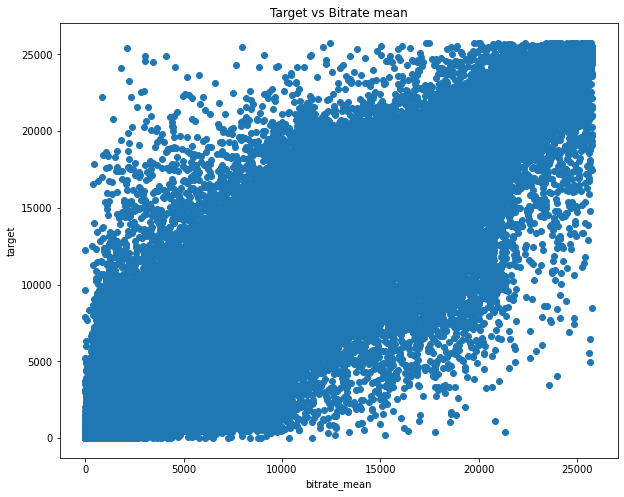

<function matplotlib.pyplot.show(*args, **kw)>

In [40]:
plt.scatter(bitrate_train_df['bitrate_mean'], bitrate_train_df['target'])
plt.title('Target vs Bitrate mean')
plt.xlabel('bitrate_mean')
plt.ylabel('target')
plt.show()
plt.show

##Models for regression
* Multiple Linear Regression 
* Plynomial Regression 
* Lasso

###Linear regression 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
eval_df.head(10)


,Actual,Predicted
0,718.0,989.742585
1,670.9,1023.386632
2,789.8,977.472237
3,723.2,1112.019597
4,693.6,1027.901334
5,732.6,1001.338287
6,755.7,1040.858604
7,668.4,1057.999982
8,581.9,979.844351
9,560.8,894.664637


In [42]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R2 score on test: ', r2_score(y_test, y_pred))
print('R2 score on train: ', r2_score(y_train, regressor.predict(x_train)))

Mean Absolute Error: 1080.411742181135
Mean Squared Error: 3831547.0235029478
Root Mean Squared Error: 1957.4337852154663
R2 score on test:  0.8924211678349961
R2 score on train:  0.8989482035517432


###Polynomial Regression

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

x_train = bitrate_train_df.drop(['target'], axis = 1)
y_train = bitrate_train_df['target']
x_test = bitrate_test_df.drop(['target'], axis = 1)
y_test = bitrate_test_df['target']

x_train = x_train[['fps_mean', 'bitrate_mean', 'bitrate_std']] #keep only selected features 
x_test = x_test[['fps_mean', 'bitrate_mean', 'bitrate_std']]   #keep only selected features 

#scaling
scaler = MinMaxScaler().fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

degrees = [1,2,3,4,5,6]

for i in degrees:
  polynomial_features = PolynomialFeatures(degree=i)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
  pipeline.fit(x_train, y_train)

  y_pred=pipeline.predict(x_test)

  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('---------------------')


Mean Absolute Error: 1080.4117421811536
Mean Squared Error: 3831547.0235029515
Root Mean Squared Error: 1957.4337852154672
---------------------
Mean Absolute Error: 1061.6941392476158
Mean Squared Error: 3827301.0763719645
Root Mean Squared Error: 1956.348914782832
---------------------
Mean Absolute Error: 1100.8376010471966
Mean Squared Error: 4807350.604863619
Root Mean Squared Error: 2192.5671266494032
---------------------
Mean Absolute Error: 1204.2218048897453
Mean Squared Error: 33194690.83320526
Root Mean Squared Error: 5761.48338826081
---------------------
Mean Absolute Error: 1324.6868205016206
Mean Squared Error: 93085804.13317776
Root Mean Squared Error: 9648.09847240262
---------------------
Mean Absolute Error: 6765.113930293512
Mean Squared Error: 544449913155.77826
Root Mean Squared Error: 737868.4931312478
---------------------


###Rgularization with Linear Regression

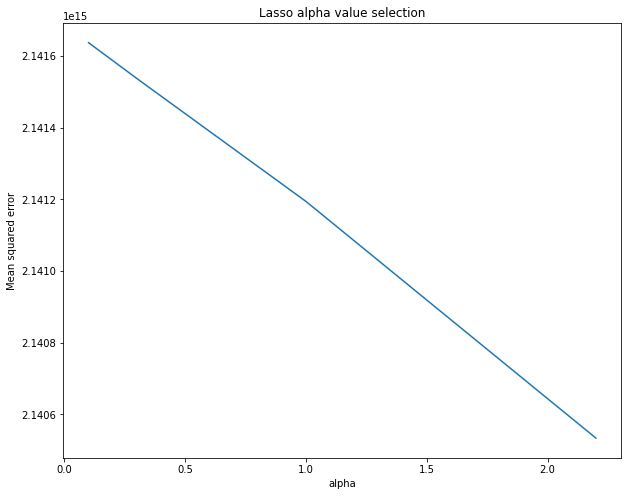

Best value of alpha: 2.2


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

x_train = bitrate_train_df.drop(['target'], axis = 1)
y_train = bitrate_train_df['target']
x_test = bitrate_test_df.drop(['target'], axis = 1)
y_test = bitrate_test_df['target']

x_train = x_train[['fps_mean', 'bitrate_mean', 'bitrate_std']] #keep only selected features 
x_test = x_test[['fps_mean', 'bitrate_mean', 'bitrate_std']]   #keep only selected features 

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)#splitting train and validation

#scaling
scaler = StandardScaler().fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)


#Lass
lasso = Lasso().fit(x_train, y_train)

#selecting alpha hyperparameter
alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    model = Lasso(alpha = alpha).fit(x_train, y_train)
    mse = mean_squared_error(model.predict(x_val),y_val)
    losses.append(mse)
plt.plot(alphas, losses)
plt.title("Lasso alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)

In [45]:
lasso = Lasso(best_alpha)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print("MSE on testset:", mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1081.1669616977745
MSE on testset: 3831673.609986728
Root Mean Squared Error: 1957.4661197544974


###Polynomial Ridge Regression
This section was an unseccsful attempt to apply Kernel Ridge, Therefore it is uncommented and left here for documnetation only.

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.preprocessing import RobustScaler
# from sklearn.metrics import mean_squared_error

# x_train = bitrate_train_df.drop(['target'], axis = 1)
# y_train = bitrate_train_df['target']
# x_test = bitrate_test_df.drop(['target'], axis = 1)
# y_test = bitrate_test_df['target']

# x_train = x_train[['bitrate_mean']] #keep only selected features 
# x_test = x_test[['bitrate_mean']]   #keep only selected features 

# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)#splitting train and validation

# #scaling
# scaler = RobustScaler().fit(x_train)
# x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
# x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)


# #KernelRIdge
# n = 2
# krr = KernelRidge(alpha=2,kernel='polynomial',degree=n).fit(x_train, y_train)
# y_pred=krr.predict(x_test)
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print('---------------------')



# Classification Task

##Reading Data

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

train_data_df = pd.read_csv('train_data.csv')
test_data_df = pd.read_csv('test_data.csv')


train_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fps_mean,406572.0,3.449756e+01,1.162549e+01,0.0,28.300000,30.000000,43.000000,1.271000e+02
fps_std,406572.0,2.285486e+00,3.708531e+00,0.0,0.316228,0.994429,2.590581,3.125408e+02
fps_lags,406572.0,1.831508e-01,1.099384e+00,0.0,0.000000,0.000000,0.000000,1.000000e+01
rtt_mean,406572.0,5.431440e+01,1.338721e+02,0.0,14.100000,32.300000,57.100000,1.289840e+04
rtt_std,406572.0,1.952502e+01,1.563643e+02,0.0,0.699206,1.490712,5.334375,4.072193e+04
dropped_frames_mean,406572.0,1.730432e+06,4.930091e+07,0.0,0.000000,0.000000,0.000000,2.097289e+09
dropped_frames_std,406572.0,1.378279e+05,9.229776e+06,0.0,0.000000,0.000000,0.000000,9.963751e+08
dropped_frames_max,406572.0,1.893339e+06,5.241003e+07,0.0,0.000000,0.000000,0.000000,2.097289e+09
auto_fec_mean,406572.0,5.141354e+01,3.483604e+01,0.0,50.000000,50.000000,50.000000,2.500000e+02
stream_quality,406572.0,6.846020e-02,2.525343e-01,0.0,0.000000,0.000000,0.000000,1.000000e+00


## Pandas Profiling

In [3]:
from pandas_profiling import ProfileReport

report = ProfileReport(train_data_df)
report.to_file('train_data_df.html')

##Data Preprocessing

In [4]:
#remove duplicates 
train_data_df.drop_duplicates(inplace=True)

In [5]:
#onehot encoding for categorical features
from category_encoders import OneHotEncoder


features_to_encode = ['auto_bitrate_state','auto_fec_state']
encoder = OneHotEncoder(cols=features_to_encode).fit(train_data_df)

train_data_df = encoder.transform(train_data_df)

In [13]:
#in case you are using colab you need to run this cell
#!pip install category_encoders

In [6]:
#Feature encoding
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#select best 8 features
selector = SelectKBest(f_classif, k=8).fit(train_data_df.drop(['stream_quality'], axis = 1), train_data_df['stream_quality'])
names = selector.get_feature_names_out()
print(names)


['fps_mean' 'fps_std' 'fps_lags' 'rtt_mean' 'rtt_std'
 'dropped_frames_mean' 'dropped_frames_std' 'dropped_frames_max']


In [7]:
x_train=train_data_df[['fps_mean', 'fps_std', 'fps_lags', 'rtt_mean', 'rtt_std','dropped_frames_mean', 'dropped_frames_std', 'dropped_frames_max']]
y_train= train_data_df['stream_quality']
x_test=test_data_df[['fps_mean', 'fps_std', 'fps_lags', 'rtt_mean', 'rtt_std','dropped_frames_mean', 'dropped_frames_std', 'dropped_frames_max']]
y_test= test_data_df['stream_quality']

In [8]:
#scaling data 
scaler = MinMaxScaler().fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

##Logistic Regression

###With Imbalanced Data

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# fit Logistic Regression
clf = LogisticRegression(penalty='l2', solver='liblinear').fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

# calculate metrics
print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))
print('Testing f1_score = {}'.format(metrics.f1_score(y_test, y_test_pred)))


Testing accuracy = 0.9408487824102202
Testing precision = 0.7213227695487426
Testing recall = 0.1334267873072512
Testing f1_score = 0.2251976125181481


###With Balanced Data

In [11]:
from scipy import stats
train_data_df = pd.read_csv('train_data.csv')
test_data_df = pd.read_csv('test_data.csv')

train_data_df.drop_duplicates(inplace=True)


features_to_encode = ['auto_bitrate_state','auto_fec_state']
encoder = OneHotEncoder(cols=features_to_encode).fit(train_data_df)
train_data_df = encoder.transform(train_data_df)

#Remove outliers 
print('shape before removal', train_data_df.shape)
train_data_df = train_data_df[(np.abs(stats.zscore(train_data_df)) < 4).all(axis=1)]
print('shape after removal', train_data_df.shape)


train_data_df_0 = train_data_df[train_data_df['stream_quality'] == 0]
train_data_df_1 = train_data_df[train_data_df['stream_quality'] == 1]

# upsampling the data
train_data_df_1_new = train_data_df_1.sample(len(train_data_df_0.index), replace=True)
train_data_df = pd.concat([train_data_df_0, train_data_df_1_new], axis=0)



x_train=train_data_df[['fps_mean', 'fps_std', 'fps_lags', 'rtt_mean', 'rtt_std']]
y_train= train_data_df['stream_quality']
x_test=test_data_df[['fps_mean', 'fps_std', 'fps_lags', 'rtt_mean', 'rtt_std']]
y_test= test_data_df['stream_quality']

scaler = MinMaxScaler().fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)




shape before removal (373142, 15)
shape after removal (352345, 15)


In [12]:
# fit Logistic Regression
clf = LogisticRegression(penalty='l2', solver='liblinear').fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

# calculate metrics
print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))
print('Testing f1_score = {}'.format(metrics.f1_score(y_test, y_test_pred)))

Testing accuracy = 0.8489137752672458
Testing precision = 0.22768317853457173
Testing recall = 0.5623168089715815
Testing f1_score = 0.3241267859110442


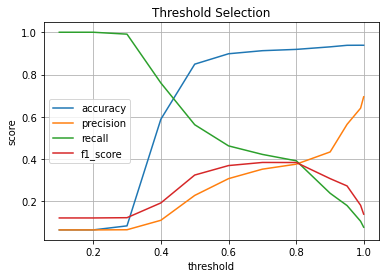

In [18]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95, 0.99, 0.999]
pred_proba = clf.predict_proba(x_test)

results = [[],[],[],[]]
for i in thresholds:
    y_test_pred_thr = np.where(pred_proba[:, 1] > i, 1, 0)
    results[0].append(metrics.accuracy_score(y_test, y_test_pred_thr))
    results[1].append(metrics.precision_score(y_test, y_test_pred_thr))
    results[2].append(metrics.recall_score(y_test, y_test_pred_thr))
    results[3].append(metrics.f1_score(y_test, y_test_pred_thr))

plt.plot(thresholds, results[0], label = 'accuracy')   
plt.plot(thresholds, results[1], label = 'precision')   
plt.plot(thresholds, results[2], label = 'recall')
plt.plot(thresholds, results[3], label = 'f1_score')

plt.title('Threshold Selection')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.grid()

sklearn Confusion Matrix for Sample set:
 [[197967  29935]
 [  6869   8825]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


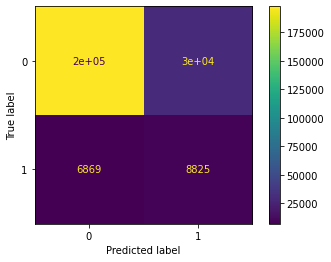

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('sklearn Confusion Matrix for Sample set:\n', confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()